In [1337]:
import pandas as pd
import matplotlib.pyplot as matplot
import numpy

In [1338]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1339]:
raw_df = pd.read_csv('data/submissions/239171B_data_file_2.csv')

In [1340]:
raw_df.describe()

,How many stories does your house have?,"How much is your household's average monthly expenditure in LKR for ""food"" items ?","How much is your household's average monthly expenditure in LKR for ""non-food"" items ?",Nearly how many red notices did you receive last year?
count,58.00000,58.000000,58.000000,58.000000
mean,1.50000,74482.758621,66379.310345,1.344828
std,0.65561,114863.342354,49415.825147,1.978407
min,0.00000,20000.000000,10000.000000,0.000000
25%,1.00000,40000.000000,30000.000000,0.000000
50%,1.00000,50000.000000,50000.000000,0.000000
75%,2.00000,75000.000000,90000.000000,2.000000
max,4.00000,900000.000000,200000.000000,10.000000


In [1341]:
raw_df.columns

Index(['Method', 'Timestamp',
       'Which of the following time periods best describes when your house was built?',
       'What do you know about the architecture of the house?',
       'Select the best option which describes your house',
       'How many stories does your house have?',
       'State the area of your house in square feet?',
       'Relationship to the head of the household', 'Gender',
       'Current attendance at school or other educational institution',
       'Main occupation',
       'How much is your household's average monthly expenditure in LKR for "food" items ?',
       'How much is your household's average monthly expenditure in LKR for "non-food" items ?',
       'What is the best representation of the major material your outside walls are made of?',
       'Which of the following options do your house use for ventilation and lighting other than windows and doors (only indoors)?',
       'What is the major type of roof installation used in your house (on 

In [1342]:
df = raw_df

In [1343]:
df.rename(columns={'Which of the following time periods best describes when your house was built?': 'Year of Construction'}, inplace=True)
df.rename(columns={'What do you know about the architecture of the house?': 'House Architecture'}, inplace=True)
df.rename(columns={'Select the best option which describes your house': 'Type of House'}, inplace=True)
df.rename(columns={'How many stories does your house have?': 'Number of Stories'}, inplace=True)
df.rename(columns={'Current attendance at school or other educational institution': 'Current Education'}, inplace=True)
df.rename(columns={'State the area of your house in square feet?': 'Floor Area'}, inplace=True)
df.rename(columns={'Was your wiring done by a professional electrician?': 'Professional Wiring'}, inplace=True)
df.rename(columns={'How much is your household\'s average monthly expenditure in LKR for "food" items ?': 'Monthly Expenditure - Food'}, inplace=True)
df.rename(columns={'How much is your household\'s average monthly expenditure in LKR for "non-food" items ?': 'Monthly Expenditure - Non Food'}, inplace=True)
df.rename(columns={'What is the best representation of the major material your outside walls are made of?': 'Outside Wall Material'}, inplace=True)
df.rename(columns={'What is the major type of roof installation used in your house (on the highest floor)?': 'Roof Installation Type'}, inplace=True)
df.rename(columns={'Nearly how many red notices did you receive last year?': 'Red Notices Last Year'}, inplace=True)
df.rename(columns={'Which of the following options do your house use for ventilation and lighting other than windows and doors (only indoors)?': 'Ventilation Type'}, inplace=True)
df.rename(columns={'Which of the following do you use in your household for generating electricity?': 'Source of Electricity'}, inplace=True)
df.rename(columns={'Which of the following best describes your behavior of ironing clothes?': 'Ironing Frequency'}, inplace=True)
df.rename(columns={'If using solar energy, which of the following purposes do you use solar energy inside your house?': 'Major Usage of Solar'}, inplace=True)
df.rename(columns={'Which of the following best describes your behavior regarding night lighting considering the whole house?': 'Night Lighting Behaviour'}, inplace=True)
df.rename(columns={'Which district you are residing?': 'District'}, inplace=True)
df.rename(columns={'Which Secretarial division your house belonged?': 'Secretarial Division'}, inplace=True)

In [1344]:
df.columns

Index(['Method', 'Timestamp', 'Year of Construction', 'House Architecture',
       'Type of House', 'Number of Stories', 'Floor Area',
       'Relationship to the head of the household', 'Gender',
       'Current Education', 'Main occupation', 'Monthly Expenditure - Food',
       'Monthly Expenditure - Non Food', 'Outside Wall Material',
       'Ventilation Type', 'Roof Installation Type', 'Red Notices Last Year',
       'Which of the below is true regarding your normal bill payment practice (example given when the bill is Rs 4566)?',
       'Professional Wiring', 'Source of Electricity', 'Major Usage of Solar',
       'Which of the following can most accurately describe your know-how in electricity bill calculation?',
       'Ironing Frequency', 'Night Lighting Behaviour',
       'Do you check your electricity meter for over-consumption?',
       'Do you look at the energy rating of an appliance when buying one?',
       'District', 'Secretarial Division'],
      dtype='object')

In [1345]:
print(df[df['Number of Stories'] == 0].shape)

(1, 28)


In [1346]:
df['Number of Stories'].describe()

count    58.00000
mean      1.50000
std       0.65561
min       0.00000
25%       1.00000
50%       1.00000
75%       2.00000
max       4.00000
Name: Number of Stories, dtype: float64

In [1347]:
# We have one entry with number of floors = 0. Replace that with the median (which is 1)

df['Number of Stories'] = df['Number of Stories'].replace(0, 1)

In [1348]:
df['Year of Construction'] = df['Year of Construction'].replace('Before 1980', '1980 >')
df['Year of Construction'] = df['Year of Construction'].replace('After 2019', '2019 <')

In [1349]:
def bar_plot(field_name: str):
    value_counts = df[field_name].value_counts().sort_index()
    cmap = matplot.get_cmap('tab10')
    plt = value_counts.plot(kind='bar',  color=cmap(numpy.arange(len(value_counts))))
    for i, v in enumerate(value_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.set_xlabel(field_name)
    plt.set_ylabel('Responses')
    plt.set_title(f'Responses by \'{field_name}\'')

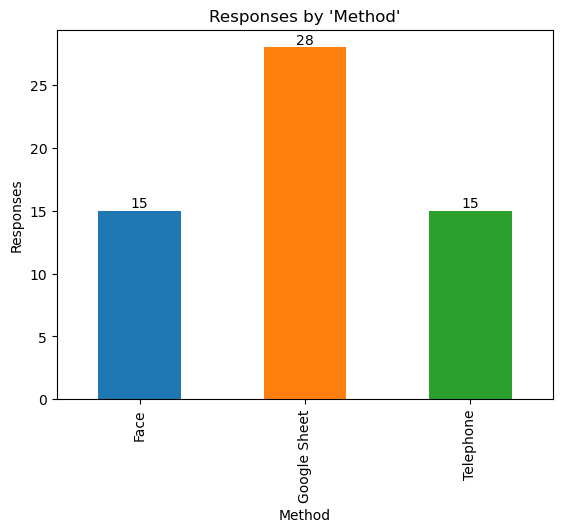

In [1350]:
bar_plot('Method')

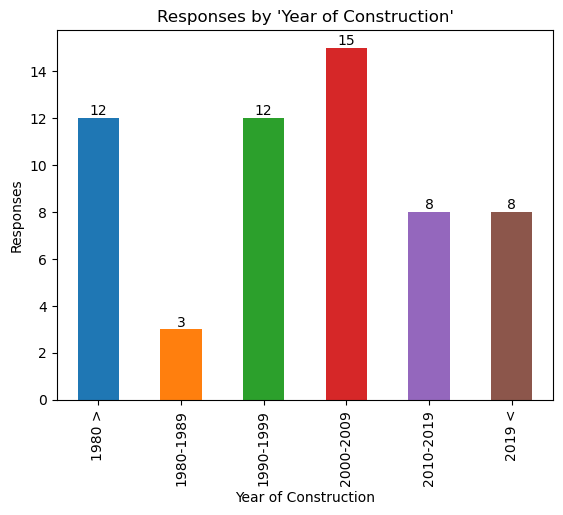

In [1351]:
bar_plot('Year of Construction')

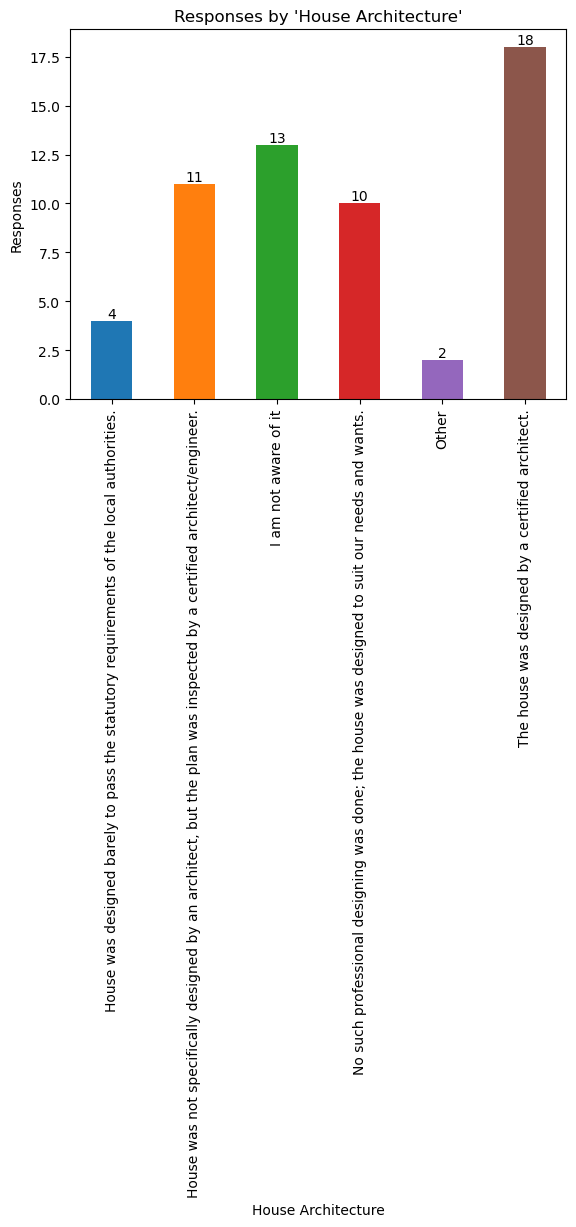

In [1352]:
bar_plot('House Architecture')

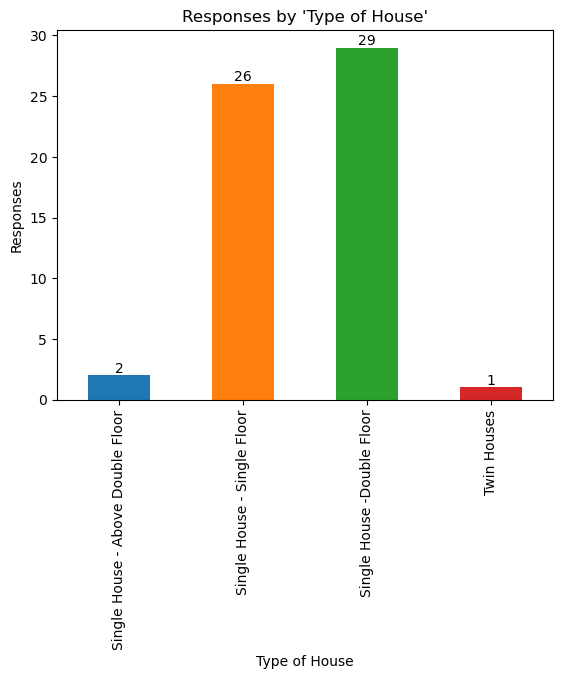

In [1353]:
bar_plot('Type of House')

In [1354]:
df['Number of Stories'] =  pd.to_numeric(df['Number of Stories'], errors='coerce')

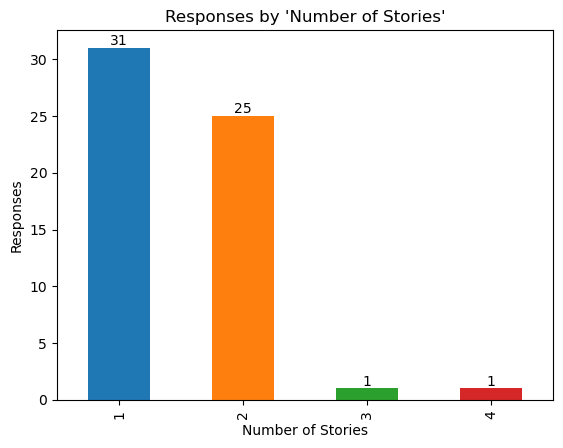

In [1355]:
bar_plot('Number of Stories')

In [1356]:
df['Floor Area'] =  pd.to_numeric(df['Floor Area'], errors='coerce')

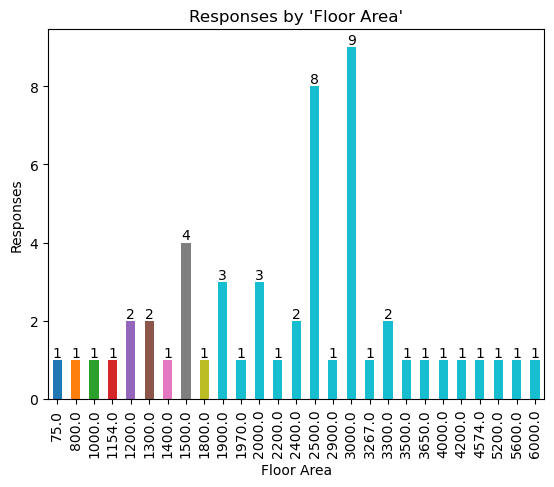

In [1357]:
bar_plot('Floor Area')

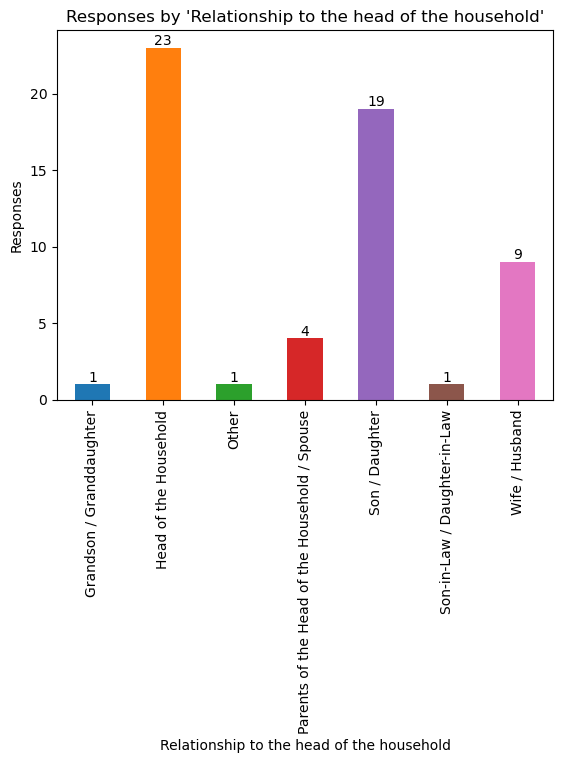

In [1358]:
bar_plot('Relationship to the head of the household')

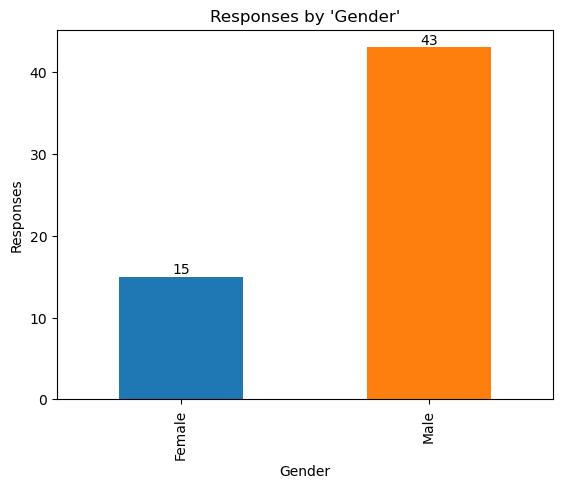

In [1359]:
bar_plot('Gender')

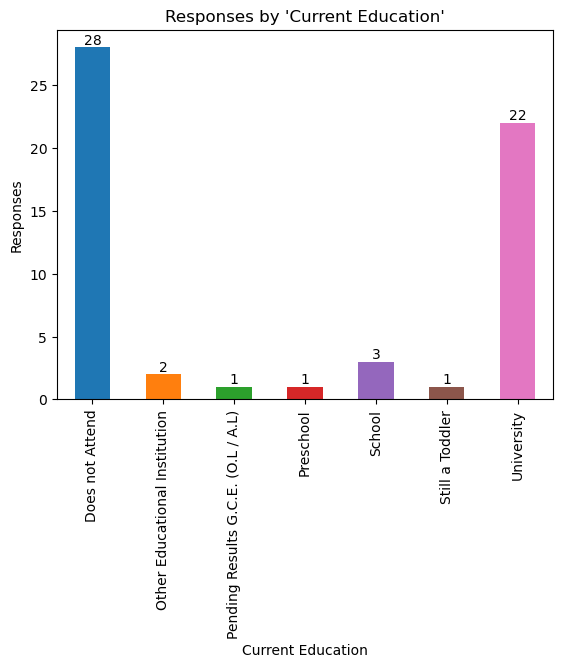

In [1360]:
bar_plot('Current Education')

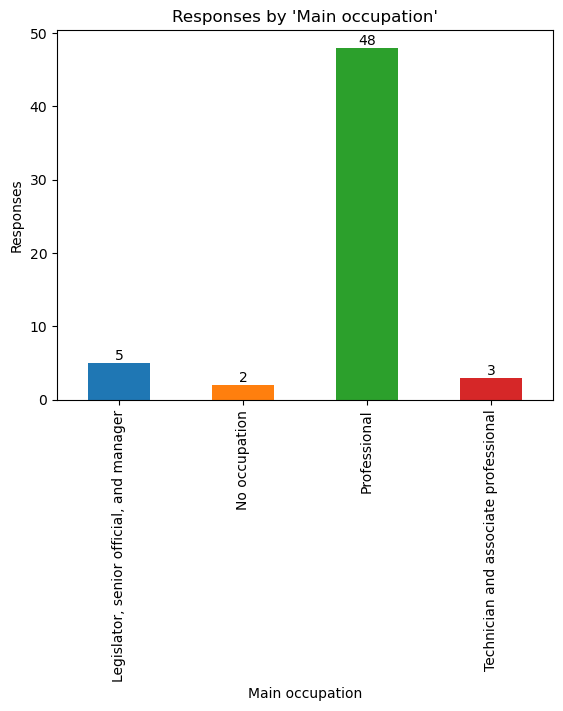

In [1361]:
bar_plot('Main occupation')

In [1362]:
df['Monthly Expenditure - Food'] =  pd.to_numeric(df['Monthly Expenditure - Food'], errors='coerce')
df['Monthly Expenditure - Food'].describe()

count        58.000000
mean      74482.758621
std      114863.342354
min       20000.000000
25%       40000.000000
50%       50000.000000
75%       75000.000000
max      900000.000000
Name: Monthly Expenditure - Food, dtype: float64

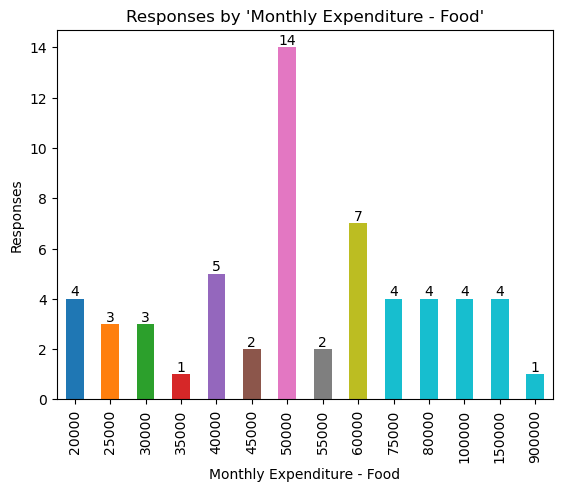

In [1363]:
bar_plot('Monthly Expenditure - Food')

In [1364]:
df['Monthly Expenditure - Non Food'] =  pd.to_numeric(df['Monthly Expenditure - Non Food'], errors='coerce')
df['Monthly Expenditure - Non Food'].describe()

count        58.000000
mean      66379.310345
std       49415.825147
min       10000.000000
25%       30000.000000
50%       50000.000000
75%       90000.000000
max      200000.000000
Name: Monthly Expenditure - Non Food, dtype: float64

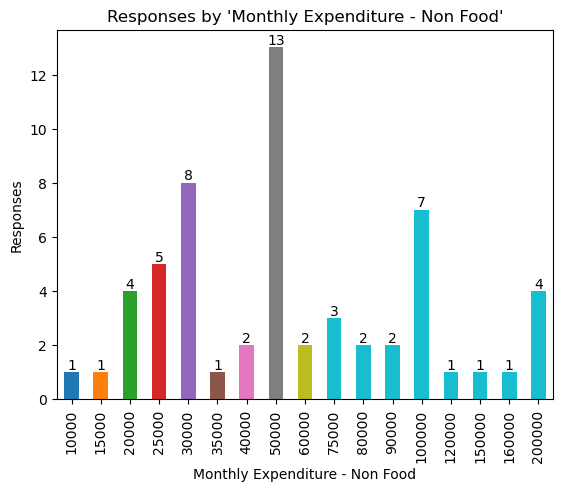

In [1365]:
bar_plot('Monthly Expenditure - Non Food')

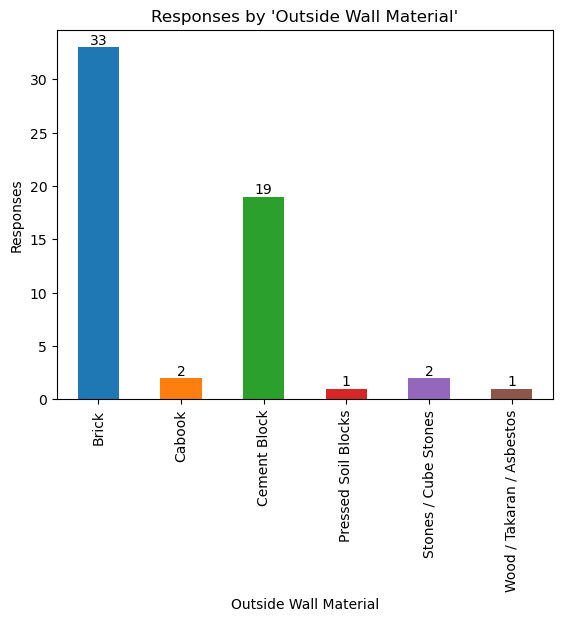

In [1366]:
bar_plot('Outside Wall Material')

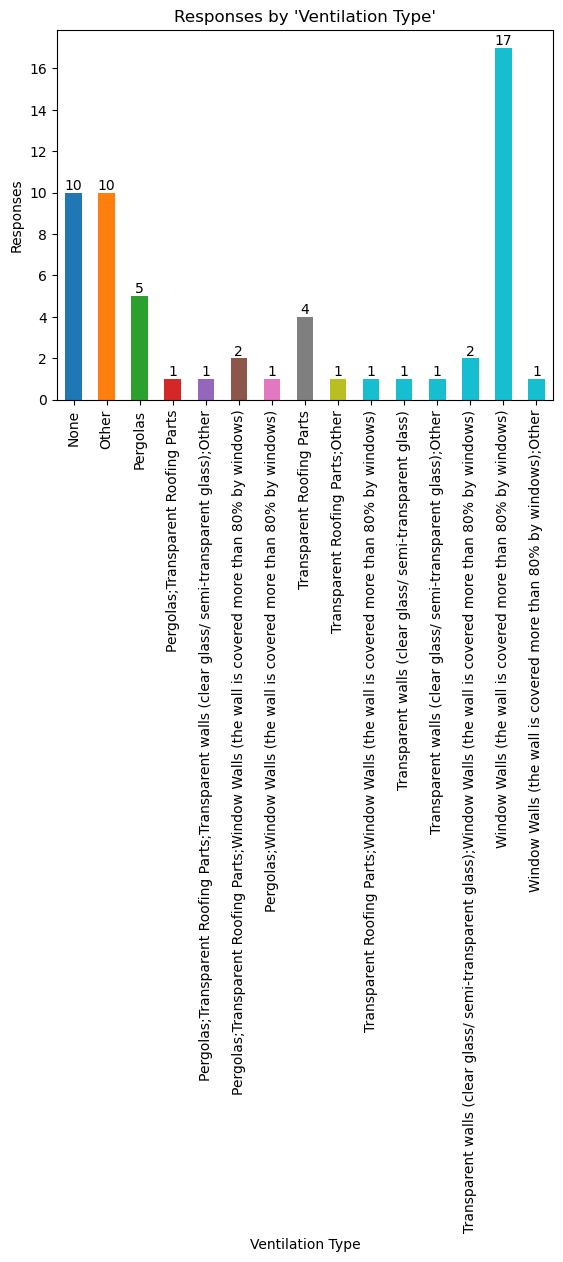

In [1367]:
bar_plot('Ventilation Type')

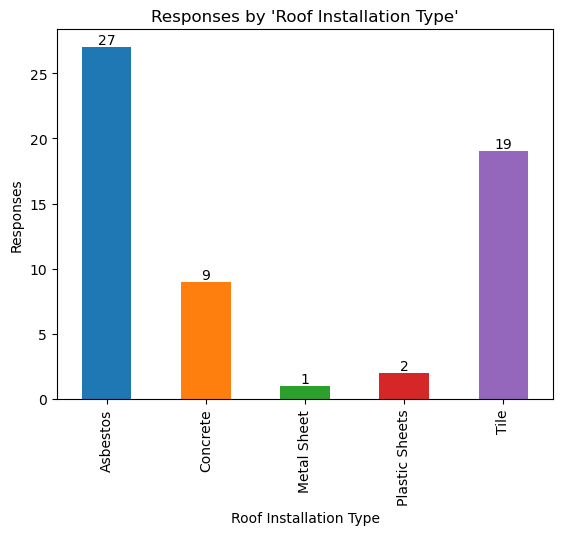

In [1368]:
bar_plot('Roof Installation Type')

In [1379]:
df['Red Notices Last Year'].describe()

count    58.000000
mean      1.344828
std       1.978407
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      10.000000
Name: Red Notices Last Year, dtype: float64

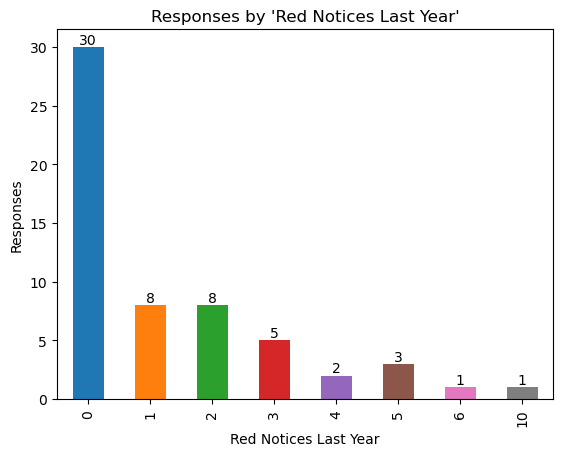

In [1369]:
bar_plot('Red Notices Last Year')

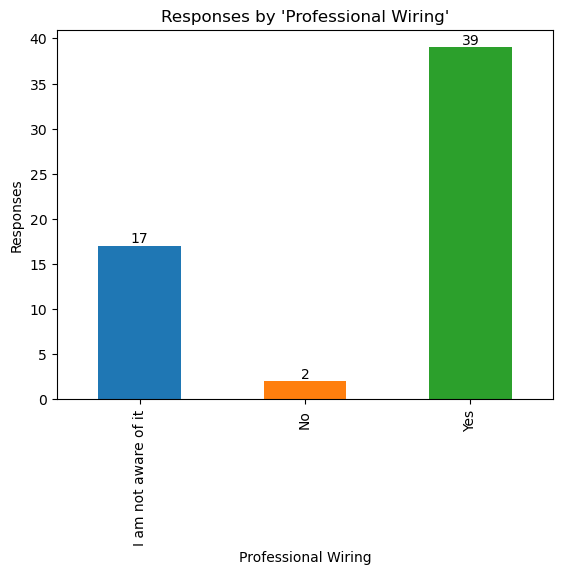

In [1370]:
bar_plot('Professional Wiring')

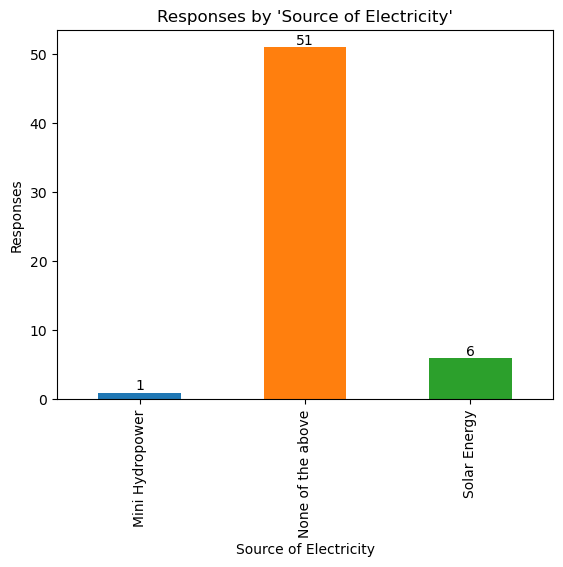

In [1371]:
bar_plot('Source of Electricity')

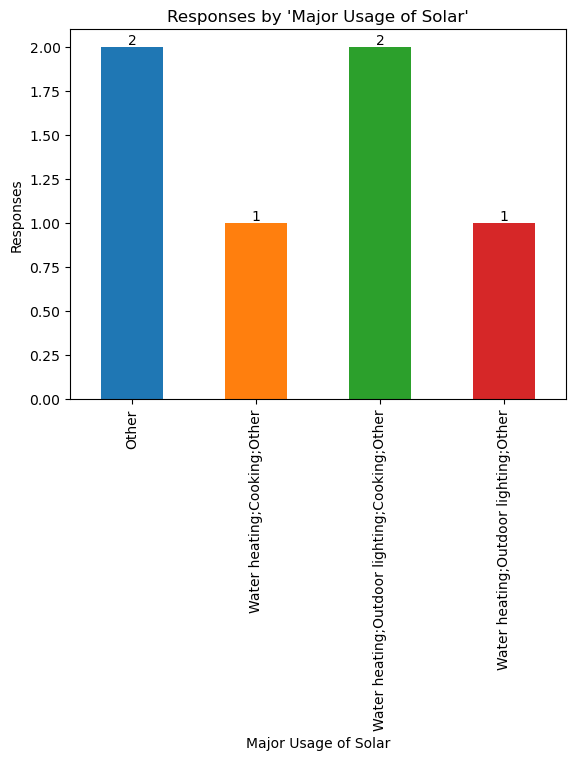

In [1372]:
bar_plot('Major Usage of Solar')

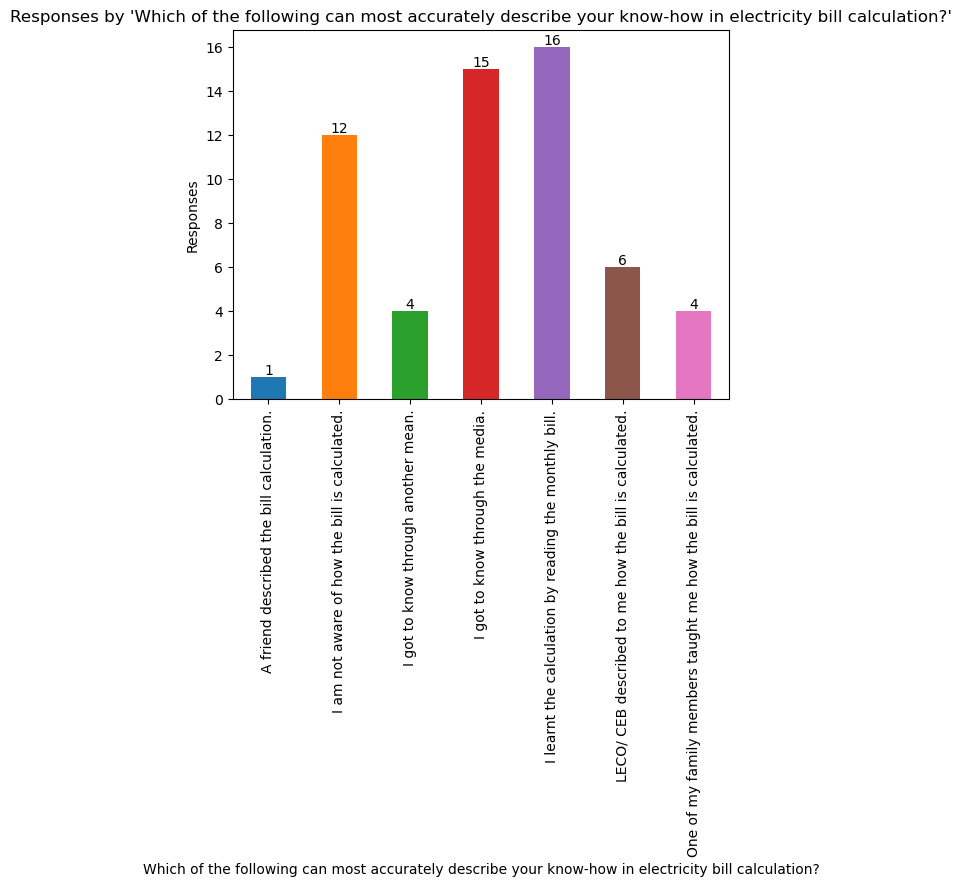

In [1373]:
bar_plot('Which of the following can most accurately describe your know-how in electricity bill calculation?')

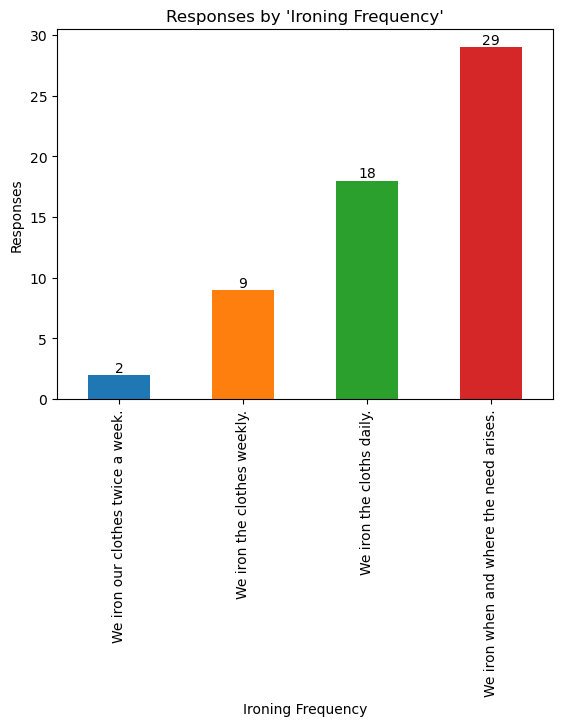

In [1374]:
bar_plot('Ironing Frequency')

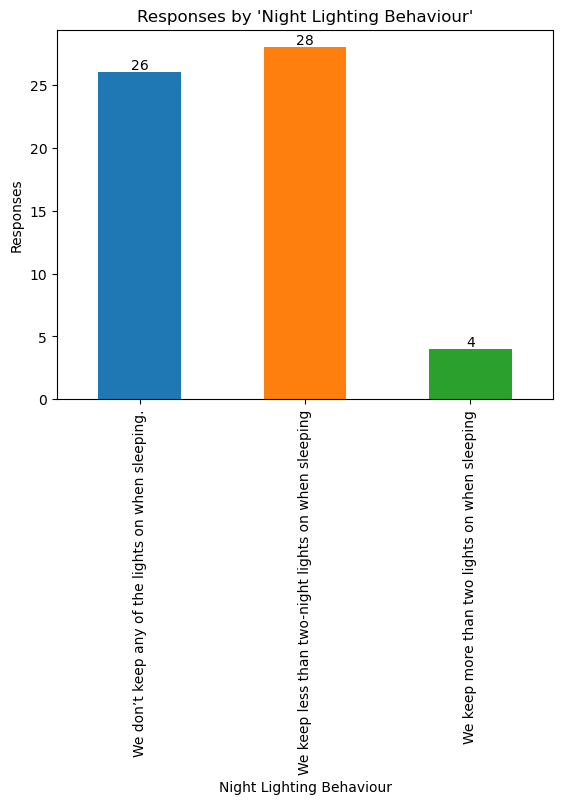

In [1375]:
bar_plot('Night Lighting Behaviour')

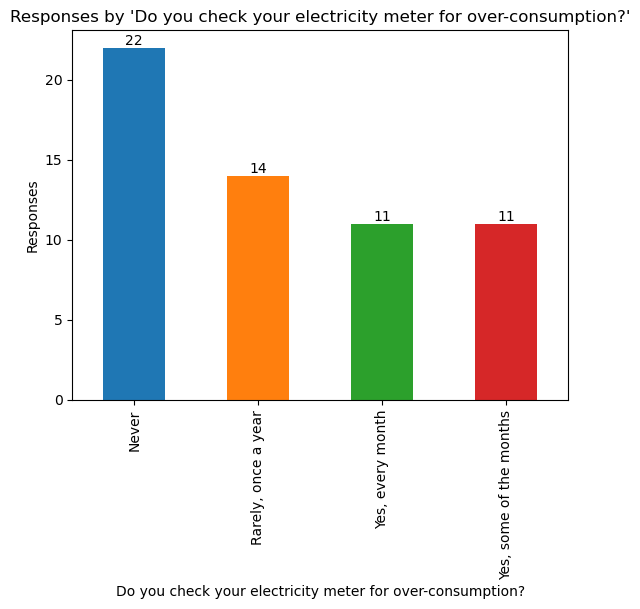

In [1376]:
bar_plot('Do you check your electricity meter for over-consumption?')

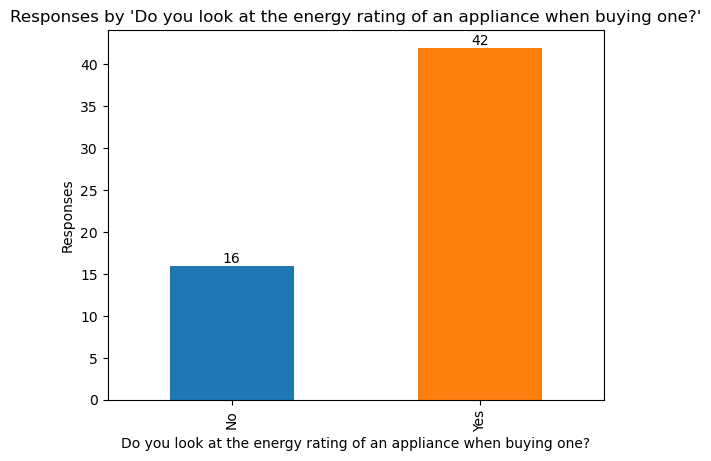

In [1377]:
bar_plot('Do you look at the energy rating of an appliance when buying one?')

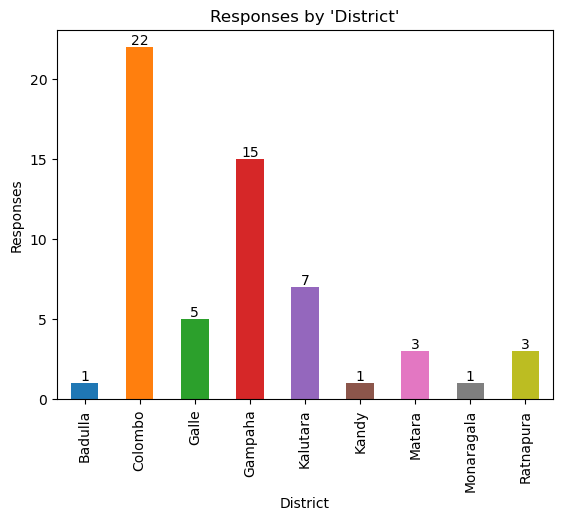

In [1378]:
bar_plot('District')